In [52]:
import numpy as np
import matplotlib.pyplot as plt


from scipy.stats import multivariate_normal, norm

In [78]:
def p(x):
    return multivariate_normal.pdf(x, [2, 5], [[2,1],[1,2]]) + multivariate_normal.pdf(x, [3,1], [[0.1,0],[0,0.1]])

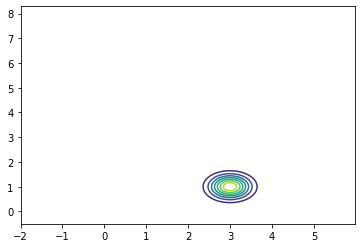

In [79]:
x, y = np.mgrid[-2:6:.01, -0.5:8.3:.01]

pos = np.dstack((x, y))
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(x, y, p(pos))

In [54]:
val_1 = np.random.multivariate_normal([2, 5], [[2,1],[1,2]], 100)
val_2 = np.random.multivariate_normal([3,1], [[0.1,0],[0,0.1]], 100)

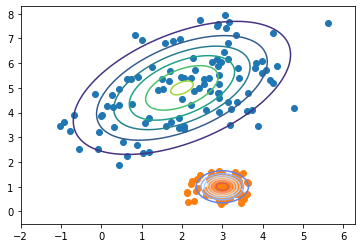

In [65]:
x1 = val_1[:,0]
y1 = val_1[:,1]

x2 = val_2[:,0]
y2 = val_2[:,1]

ax = plt.axes()

x, y = np.mgrid[-10:10:.1, -10:10:.1]
rv = multivariate_normal([2, 5], [[2,1],[1,2]])
data = np.dstack((x, y))
z = rv.pdf(data)
ax.contour(x, y, z)

x, y = np.mgrid[-10:10:.1, -10:10:.1]
rv = multivariate_normal([3,1], [[0.1,0],[0,0.1]])
data = np.dstack((x, y))
z = rv.pdf(data)
ax.contour(x, y, z, cmap='coolwarm')
ax.set_xlim([-2, 6.3])
ax.set_ylim([-0.5, 8.3])



ax.scatter(x1,y1)
ax.scatter(x2,y2)



# Rejection Sampling

In [56]:
print(probability([0.5,0.5]))

[[5.42597269 5.50982681]
 [7.88021861 9.40249265]]


# Importance Sampling